In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(seed=999)

In [3]:
X = stats.chi2(2).rvs(size=150)
Y = stats.norm(3, 1).rvs(size=150)

In [4]:
table_data = [[X.mean(), X.var()],
              [Y.mean(), Y.var()]]
pd.DataFrame(index=['X', 'Y'], columns=['mean', 'var'], data=table_data)

,mean,var
X,2.319274,4.958154
Y,2.868071,0.942418


In [5]:
print(f"pearsonr: {stats.pearsonr(X, Y)} spearmanr: {stats.spearmanr(X, Y)}, kendalltau: {stats.kendalltau(X, Y)}")

pearsonr: PearsonRResult(statistic=-0.014840687583095792, pvalue=0.8569563278443556) spearmanr: SignificanceResult(statistic=-0.05581936974976666, pvalue=0.49748318303922756), kendalltau: SignificanceResult(statistic=-0.034988814317673374, pvalue=0.5251893982860943)


Text(0, 0.5, 'Y')

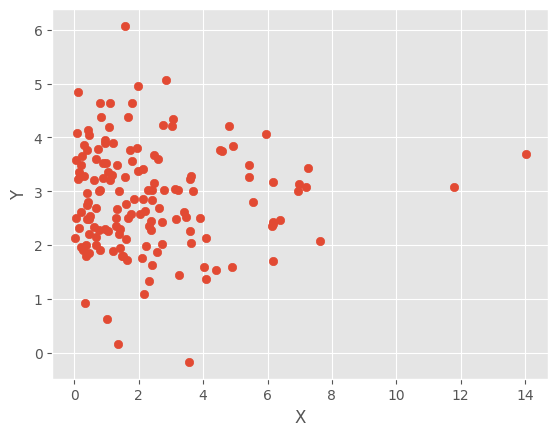

In [6]:
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
hist, xedges, yedges = np.histogram2d(X, Y, bins=[4, 4], range=[[-0.2, 8], [1, 5]])
pd.DataFrame(hist, 
             index=[f'[{yedges[i]:.3f}; {yedges[i + 1]:.3f})' for i in range(len(yedges) - 1)], 
             columns=[f'[{xedges[i]:.3f}; {xedges[i + 1]:.3f})' for i in range(len(xedges) - 1)])

,[-0.200; 1.850),[1.850; 3.900),[3.900; 5.950),[5.950; 8.000)
[1.000; 2.000),12.0,27.0,27.0,10.0
[2.000; 3.000),7.0,16.0,14.0,4.0
[3.000; 4.000),4.0,3.0,5.0,1.0
[4.000; 5.000),1.0,6.0,4.0,1.0


In [8]:
res = stats.chi2_contingency(hist)
print(res)
pd.DataFrame(res.expected_freq,
             index=[f'[{yedges[i]:.3f}; {yedges[i + 1]:.3f})' for i in range(len(yedges) - 1)], 
             columns=[f'[{xedges[i]:.3f}; {xedges[i + 1]:.3f})' for i in range(len(xedges) - 1)])

Chi2ContingencyResult(statistic=4.013785468355306, pvalue=0.9105028579723209, dof=9, expected_freq=array([[12.84507042, 27.83098592, 26.76056338,  8.56338028],
       [ 6.92957746, 15.01408451, 14.43661972,  4.61971831],
       [ 2.1971831 ,  4.76056338,  4.57746479,  1.46478873],
       [ 2.02816901,  4.3943662 ,  4.22535211,  1.35211268]]))


,[-0.200; 1.850),[1.850; 3.900),[3.900; 5.950),[5.950; 8.000)
[1.000; 2.000),12.845070,27.830986,26.760563,8.563380
[2.000; 3.000),6.929577,15.014085,14.436620,4.619718
[3.000; 4.000),2.197183,4.760563,4.577465,1.464789
[4.000; 5.000),2.028169,4.394366,4.225352,1.352113


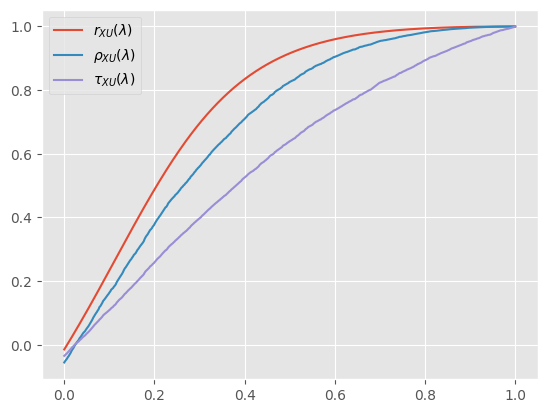

In [9]:
gamma = np.linspace(0, 1, 500)

r = []
rho = []
tau = []

for point in gamma:
    U = point * X + (1 - point) * Y
    r.append(stats.pearsonr(X, U).statistic)
    rho.append(stats.spearmanr(X, U).statistic)
    tau.append(stats.kendalltau(X, U).statistic)
    
    
plt.plot(gamma, r, label=r'$r_{XU}(\lambda)$')
plt.plot(gamma, rho, label=r'$\rho_{XU}(\lambda)$')
plt.plot(gamma, tau, label=r'$\tau_{XU}(\lambda)$')
_ = plt.legend()

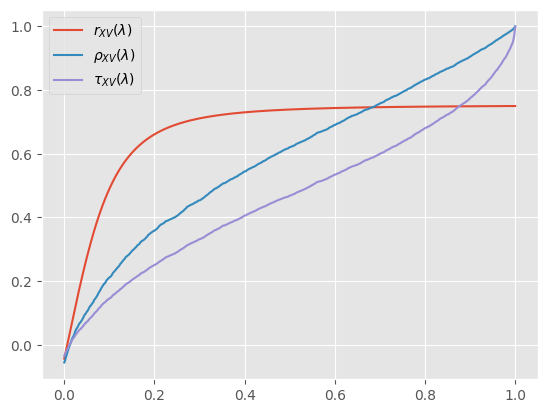

In [10]:
r = []
rho = []
tau = []

for point in gamma:
    V = point * X ** 3 + (1 - point) * Y ** 3
    r.append(stats.pearsonr(X, V).statistic)
    rho.append(stats.spearmanr(X, V).statistic)
    tau.append(stats.kendalltau(X, V).statistic)
    
    
plt.plot(gamma, r, label=r'$r_{XV}(\lambda)$')
plt.plot(gamma, rho, label=r'$\rho_{XV}(\lambda)$')
plt.plot(gamma, tau, label=r'$\tau_{XV}(\lambda)$')
_ = plt.legend()

Text(0, 0.5, 'V')

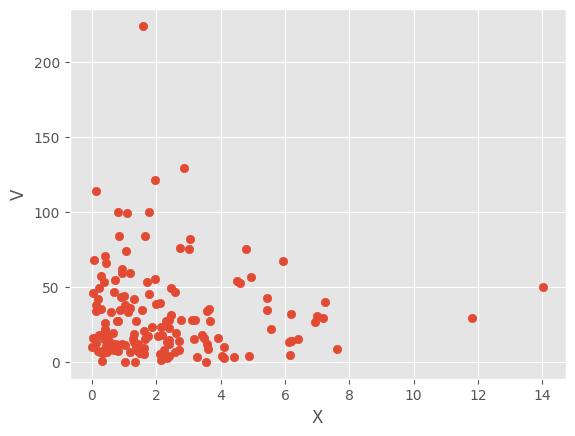

In [21]:
plt.scatter(X, Y**3)
plt.xlabel('X')
plt.ylabel('V')

Text(0, 0.5, 'rankdata(V)')

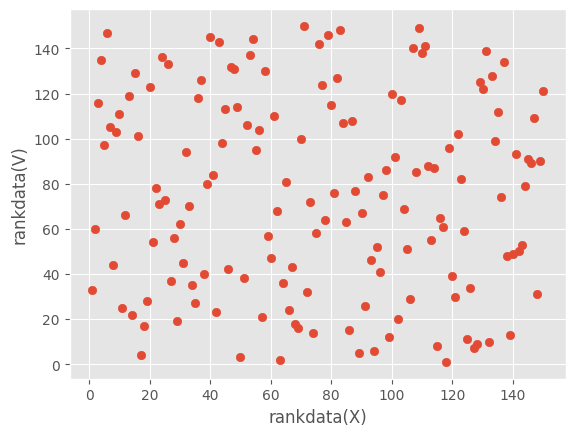

In [22]:
plt.scatter(stats.rankdata(X), stats.rankdata(Y**3))
plt.xlabel('rankdata(X)')
plt.ylabel('rankdata(V)')

Text(0, 0.5, 'V')

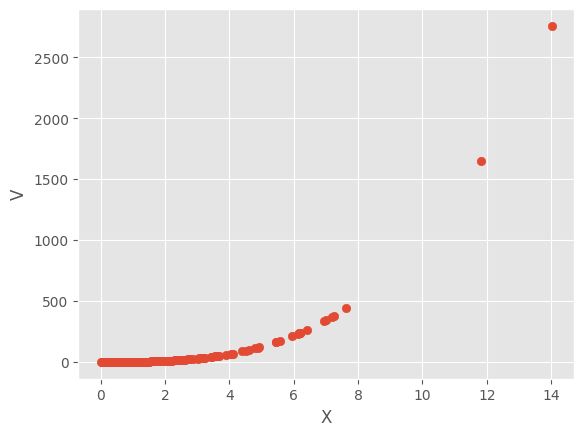

In [23]:
plt.scatter(X, X**3)
plt.xlabel('X')
plt.ylabel('V')

Text(0, 0.5, 'rankdata(V)')

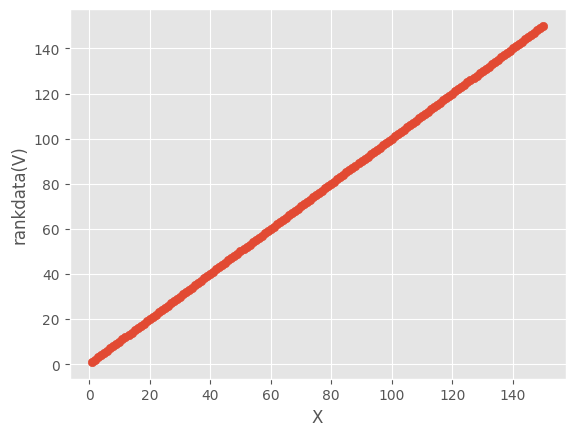

In [25]:
plt.scatter(stats.rankdata(X), stats.rankdata(X**3))
plt.xlabel('X')
plt.ylabel('rankdata(V)')